<a href="https://colab.research.google.com/github/wallik2/BERT_for_Emoji/blob/main/%5BML_project%5D_1_BERT_Training_model_for_Emojis_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

SETUP

In [ ]:
!pip install kora kaggle --quiet

     |████████████████████████████████| 57 kB 4.2 MB/s 
     |████████████████████████████████| 56 kB 3.7 MB/s 


In [ ]:
from kora import kaggle

print("If failed, download Kaggle API to your drive first")

If failed, download API to your drive first (from kaggle)


In [ ]:
import pandas as pd, numpy as np,seaborn as sns
import tensorflow as tf, torch
import sys


In [ ]:
# DON"T RUN THE CODE IF YOU DIDN"T ENABLE GPU YET
if tf.test.gpu_device_name() == '':
  print("make sure to turn on GPU")
  sys.exit()

else:
  print('GPU enabled')

your current device is cuda 


GPU enabled




---



import data

In [ ]:
kaggle.search('emotions-dataset-for-nlp')

ref  ... downloadCount
0                praveengovi/emotions-dataset-for-nlp  ...          7315
1                  iwilldoit/emotions-sensor-data-set  ...          4013
2     birdy654/eeg-brainwave-dataset-feeling-emotions  ...          4844
3                        ishantjuyal/emotions-in-text  ...           780
4                      gauravsharma99/ck48-5-emotions  ...           499
5                                  sankha1998/emotion  ...           601
6                        uldisvalainis/audio-emotions  ...           801
7          kingofarmy/musical-emotions-classification  ...           210
8   somnath796/detect-emotions-of-your-favorite-toons  ...           391
9        fernandojvdasilva/stock-tweets-ptbr-emotions  ...           370
10            olgabelitskaya/child-and-adult-emotions  ...            63
11         a13x10/basic-arabic-vocal-emotions-dataset  ...           255
12        anjaneyatripathi/emotion-classification-nlp  ...           446
13     srinivas365/multilabel-classification-emotions  ...           302
14  kishor1210/detect-emotions-of-your-favorite-toons  ...            59
15   aibuzz/audio-classification-predict-the-emotions  ...            17
16  antoniomenezes/words-in-portuguese-br-and-emot...  ...           121
17                                ayush20892/emotions  ...            58
18  rahulsingh731/detect-emotions-of-your-favorite...  ...            25
19         pashupatigupta/emotion-detection-from-text  ...          1219

[20 rows x 5 columns]

In [ ]:
kaggle.download('praveengovi/emotions-dataset-for-nlp')

  0% 0.00/721k [00:00<?, ?B/s]
100% 721k/721k [00:00<00:00, 49.6MB/s]




---



In [ ]:
col_name = ['text','emoji']

In [ ]:
train  = pd.read_csv('/content/train.txt',delimiter=';',header=None,names=col_name)
val =  pd.read_csv('/content/val.txt',delimiter=';',header=None,names=col_name)
test =  pd.read_csv('/content/test.txt',delimiter=';',header=None,names=col_name)



---



In [ ]:
train

text    emoji
0                                i didnt feel humiliated  sadness
1      i can go from feeling so hopeless to so damned...  sadness
2       im grabbing a minute to post i feel greedy wrong    anger
3      i am ever feeling nostalgic about the fireplac...     love
4                                   i am feeling grouchy    anger
...                                                  ...      ...
15995  i just had a very brief time in the beanbag an...  sadness
15996  i am now turning and i feel pathetic that i am...  sadness
15997                     i feel strong and good overall      joy
15998  i feel like this was such a rude comment and i...    anger
15999  i know a lot but i feel so stupid because i ca...  sadness

[16000 rows x 2 columns]

In [ ]:
def miss_val(df):
  if df.isna().sum().all() == 0 :
    return 'no missing value'
  else:
    return 'have missing value'
    
print(f'train : {miss_val(train)}')
print(f'val : {miss_val(val)}')
print(f'test : {miss_val(test)}')

train : no missing value
val : no missing value
test : no missing value


training set size : 16000


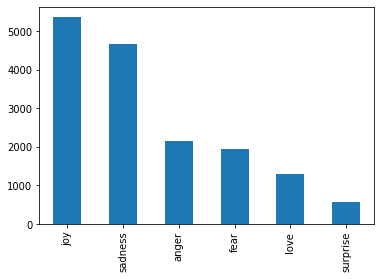

In [ ]:
print(f'training set size : {len(train)}')

pd.value_counts(train['emoji']).plot.bar()

training set size : 2000


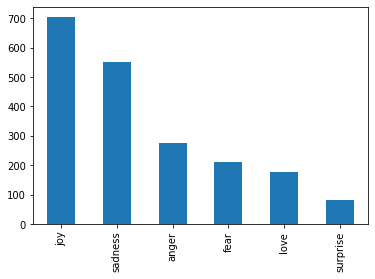

In [ ]:
print(f'training set size : {len(val)}')

pd.value_counts(val['emoji']).plot.bar()

training set size : 2000


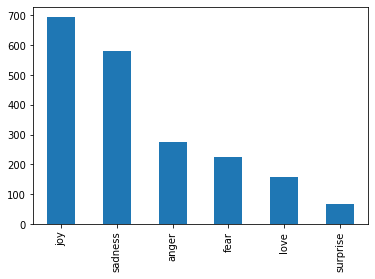

In [ ]:
print(f'training set size : {len(test)}')

pd.value_counts(test['emoji']).plot.bar()

In [ ]:
train.isna().sum().all() == 1

False

In [ ]:
miss_val(train)

'no missing value'

ALL CHECKED!




---



TRAINING DATA

In [ ]:
df_train = train.copy()

df_val = val.copy()

In [ ]:
# Make label numerical

possible_labels = df_train.emoji.unique()

label_dict = {}
for index, possible_label in enumerate(possible_labels):
    label_dict[possible_label] = index

label_dict

{'anger': 1, 'fear': 4, 'joy': 5, 'love': 2, 'sadness': 0, 'surprise': 3}

In [ ]:
# replace emoji ny the label number
df_train['label'] = df_train.emoji.replace(label_dict)
df_val['label'] = df_val.emoji.replace(label_dict)

In [ ]:
df_train

text    emoji  label
0                                i didnt feel humiliated  sadness      0
1      i can go from feeling so hopeless to so damned...  sadness      0
2       im grabbing a minute to post i feel greedy wrong    anger      1
3      i am ever feeling nostalgic about the fireplac...     love      2
4                                   i am feeling grouchy    anger      1
...                                                  ...      ...    ...
15995  i just had a very brief time in the beanbag an...  sadness      0
15996  i am now turning and i feel pathetic that i am...  sadness      0
15997                     i feel strong and good overall      joy      5
15998  i feel like this was such a rude comment and i...    anger      1
15999  i know a lot but i feel so stupid because i ca...  sadness      0

[16000 rows x 3 columns]

In [ ]:
df_train.head()

text    emoji  label
0                            i didnt feel humiliated  sadness      0
1  i can go from feeling so hopeless to so damned...  sadness      0
2   im grabbing a minute to post i feel greedy wrong    anger      1
3  i am ever feeling nostalgic about the fireplac...     love      2
4                               i am feeling grouchy    anger      1

In [ ]:
df_val.head()

text    emoji  label
0  im feeling quite sad and sorry for myself but ...  sadness      0
1  i feel like i am still looking at a blank canv...  sadness      0
2                     i feel like a faithful servant     love      2
3                  i am just feeling cranky and blue    anger      1
4  i can have for a treat or if i am feeling festive      joy      5



---



In [ ]:
# Split the data (both train and val)

(X_train , y_train) = (df_train.text , df_train.emoji)
(X_val , y_val) = (df_val.text , df_val.emoji)

In [ ]:
#Check the count of both train and val

label_count = pd.concat([train,val],axis=0)
label_count.reset_index(drop=True,inplace=True)
label_count['label'] = label_count.emoji.replace(label_dict)
label_count['data_type'] = ['not_set']*label_count.shape[0]

label_count.loc[:16000, 'data_type'] = 'train'
label_count.loc[16000:, 'data_type'] = 'val'

label_count.groupby(['emoji', 'label', 'data_type']).count()

#We don't use anymore 
del label_count

CHECKED



---



BERT

In [ ]:
!pip install transformers --quiet

     |████████████████████████████████| 2.9 MB 13.1 MB/s 
     |████████████████████████████████| 3.3 MB 39.4 MB/s 
     |████████████████████████████████| 56 kB 3.8 MB/s 
     |████████████████████████████████| 596 kB 43.0 MB/s 
     |████████████████████████████████| 895 kB 37.5 MB/s 


In [ ]:
import torch
from tqdm.notebook import tqdm

#TOKENIZER
from transformers import BertTokenizer
from torch.utils.data import TensorDataset


from transformers import BertForSequenceClassification


In [ ]:
# construct BERT tokenizer ( known as WordPiece ) 

# tokenizer: split raw text into tokens (represent in numeric data)

tokenizer = BertTokenizer.from_pretrained('bert-base-uncased', 
                                          do_lower_case=True)

Downloading:   0%|          | 0.00/226k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/28.0 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/455k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/570 [00:00<?, ?B/s]

NEXT STATION: https://github.com/susanli2016/NLP-with-Python/blob/master/Text_Classification_With_BERT.ipynb

Batch encode plus VS Batch encode : https://stackoverflow.com/questions/61708486/whats-difference-between-tokenizer-encode-and-tokenizer-encode-plus-in-hugging

In [ ]:
""" encode_plus support encoding more than 1 sentence """

"""we decide to return 3 things from the tokenizer : token vector, attention mask, label in PyTorch form """
# tokenize the training data
encoded_data_train = tokenizer.batch_encode_plus(
    batch_text_or_text_pairs = df_train['text'].values, 
    
    #special token used to make arrays of tokens the same size for batching purpose (which fulfill by zero element when the size is small)
    add_special_tokens=True, 

    # we want attention mask too, to don't fully show text all text, but we hide some
    return_attention_mask=True, 

    #Padding the returned sequence to fit the max length (maybe if the returned sequence is larger than max length)
    pad_to_max_length=True, 

    #limit the size of numerical token
    max_length=256, 

    #return the numerical tokens in form of PyTorch
    return_tensors='pt'
)

# tokenize the validation data
encoded_data_val = tokenizer.batch_encode_plus(
    batch_text_or_text_pairs = df_val['text'].values, 
    add_special_tokens=True, 
    return_attention_mask=True, 
    pad_to_max_length=True, 
    max_length=256, 
    return_tensors='pt'
)




#our token vector
input_ids_train = encoded_data_train['input_ids']

#mask for each instance
attention_masks_train = encoded_data_train['attention_mask']

#transform array to Pytorch object
labels_train = torch.tensor(df_train['label'].values)

input_ids_val = encoded_data_val['input_ids']
attention_masks_val = encoded_data_val['attention_mask']
labels_val = torch.tensor(df_val['label'].values)


#We want tensor dataset, cuz one feature can store matrix ( 1d+ tensor) instead of just scalar ( 1d tensor) )
dataset_train = TensorDataset(input_ids_train, attention_masks_train, labels_train)
dataset_val = TensorDataset(input_ids_val, attention_masks_val, labels_val)

Truncation was not explicitly activated but `max_length` is provided a specific value, please use `truncation=True` to explicitly truncate examples to max length. Defaulting to 'longest_first' truncation strategy. If you encode pairs of sequences (GLUE-style) with the tokenizer you can select this strategy more precisely by providing a specific strategy to `truncation`.
/usr/local/lib/python3.7/dist-packages/transformers/tokenization_utils_base.py:2217: FutureWarning: The `pad_to_max_length` argument is deprecated and will be removed in a future version, use `padding=True` or `padding='longest'` to pad to the longest sequence in the batch, or use `padding='max_length'` to pad to a max length. In this case, you can give a specific length with `max_length` (e.g. `max_length=45`) or leave max_length to None to pad to the maximal input size of the model (e.g. 512 for Bert).
  FutureWarning,




---



In [ ]:
#token vector of each instance w/ size 16k (training size)

encoded_data_train['input_ids']

tensor([[  101,  1045,  2134,  ...,     0,     0,     0],
        [  101,  1045,  2064,  ...,     0,     0,     0],
        [  101, 10047,  9775,  ...,     0,     0,     0],
        ...,
        [  101,  1045,  2514,  ...,     0,     0,     0],
        [  101,  1045,  2514,  ...,     0,     0,     0],
        [  101,  1045,  2113,  ...,     0,     0,     0]])

In [ ]:
#show how it masks for each sentence

encoded_data_train['attention_mask']

tensor([[1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 0, 0, 0],
        ...,
        [1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 0, 0, 0]])

In [ ]:
#transform array to Pytorch object

torch.tensor(df_train['label'].values)

tensor([0, 0, 1,  ..., 5, 1, 0])



---



OUR BERT MODEL

In [ ]:
model = BertForSequenceClassification.from_pretrained("bert-base-uncased",
                                                      #We want them to return the label of each emojis (6) 
                                                      num_labels=len(label_dict),

                                                      # We don't want both attention and hidden state as output
                                                      output_attentions=False,
                                                      output_hidden_states=False)

Downloading:   0%|          | 0.00/420M [00:00<?, ?B/s]

Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertForSequenceClassification: ['cls.predictions.transform.dense.bias', 'cls.predictions.decoder.weight', 'cls.predictions.transform.dense.weight', 'cls.predictions.transform.LayerNorm.weight', 'cls.seq_relationship.bias', 'cls.predictions.transform.LayerNorm.bias', 'cls.seq_relationship.weight', 'cls.predictions.bias']
- This IS expected if you are initializing BertForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of BertForSequenceClassification were not initialized from the model checkpoint at



---



DATALOADER (Random sampling, seq samp) : https://www.scottcondron.com/jupyter/visualisation/audio/2020/12/02/dataloaders-samplers-collate.html#DataLoaders-are-magic.

In [ ]:
from torch.utils.data import DataLoader, RandomSampler, SequentialSampler

#for limited memory #next:32
batch_size = 3

# randomly shuffle the data; 
dataloader_train = DataLoader(dataset_train, 
                              sampler=RandomSampler(dataset_train), 
                              batch_size=batch_size)

# order the data
dataloader_validation = DataLoader(dataset_val, 
                                   sampler=SequentialSampler(dataset_val), 
                                   batch_size=batch_size)

In [ ]:
# check out the sequence of indices/keys used in data loading (training)

"""
for i in dataloader_train.sampler:
  print(i)
"""

'\nfor i in dataloader_train.sampler:\n  print(i)\n'

In [ ]:
# (validation)

"""
for i in dataloader_validation.sampler:
  print(i)
"""

'\nfor i in dataloader_validation.sampler:\n  print(i)\n'



---



Numerical stable (for eps) : https://nhigham.com/2020/08/04/what-is-numerical-stability/

In [ ]:
from transformers import AdamW, get_linear_schedule_with_warmup

#optimizer can tell the network how to change its weights.

#Adam adapt the learning rate, preventing the loss function from diverge
optimizer = AdamW(model.parameters(),
                  
                  #learning rate
                  lr=1e-5, 

                  #acceptable error
                  eps=1e-8)

given lr as learning rate, N as number of Epochs

<fieldset>

- The first epoch use 1*lr/N as learning rate  (This epoch is the most large update weight, since the slope is extremely high.. so it updates a big parameter)

- The second epoch use 2*lr/N as learning rate

- The ith epoch use i*lr/N as learning rate
</fieldset>

So, the learning rate will start from nearly zero to lr that you set


warmup to prevent early overfitting (supernatural belief, and exponentially update the weight)

This help limit the learning rate of the early epoch

The first epoch use 1*lr/N as learning rate

Prevevnt this worst case : If your shuffled data happens to <u>include a cluster of related, strongly-featured observations</u>, your model's initial training can skew badly toward those features -- or worse, toward incidental features that aren't truly related to the topic at all.

ref: [Warmup learning rate](https://stackoverflow.com/questions/55933867/what-does-learning-rate-warm-up-mean/55942518)

In [ ]:
# (linearly) learning rate warm up

epochs = 5 #@param {type:"slider", min:1, max:100, step:1}

scheduler = get_linear_schedule_with_warmup(optimizer, 
                                            num_warmup_steps=0,
                                            num_training_steps=len(dataloader_train)*epochs)


In [ ]:
#our evaluation


from sklearn.metrics import f1_score

def f1_score_func(preds, labels):
    preds_flat = np.argmax(preds, axis=1).flatten()
    labels_flat = labels.flatten()
    return f1_score(labels_flat, preds_flat, average='weighted')

# easier to see what's wrong with the wrong prediction of each class
def accuracy_per_class(preds, labels):
    label_dict_inverse = {v: k for k, v in label_dict.items()}
    
    preds_flat = np.argmax(preds, axis=1).flatten()
    labels_flat = labels.flatten()

    for label in np.unique(labels_flat):
        y_preds = preds_flat[labels_flat==label]
        y_true = labels_flat[labels_flat==label]
        print(f'Class: {label_dict_inverse[label]}')
        print(f'Accuracy: {len(y_preds[y_preds==label])}/{len(y_true)}\n')



---



#Training Loops

In [ ]:
#Set Random seed (for predictable random result)

import random

seed_val = 17
random.seed(seed_val)
np.random.seed(seed_val)
torch.manual_seed(seed_val)
torch.cuda.manual_seed_all(seed_val)

In [ ]:
# Prepare device (expect GPU called CUDA)

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model.to(device)

print(f'your current device is {device} \n\n')

your current device is cuda 




In [ ]:
# Using model to evaluate and predict the model

def evaluate(dataloader_val):

    model.eval()
    
    loss_val_total = 0
    predictions, true_vals = [], []
    
    for batch in dataloader_val:
        
        batch = tuple(b.to(device) for b in batch)
        
        inputs = {'input_ids':      batch[0],
                  'attention_mask': batch[1],
                  'labels':         batch[2],
                 }

        with torch.no_grad():        
            outputs = model(**inputs)
            
        loss = outputs[0]
        logits = outputs[1]
        loss_val_total += loss.item()

        logits = logits.detach().cpu().numpy()
        label_ids = inputs['labels'].cpu().numpy()
        predictions.append(logits)
        true_vals.append(label_ids)
    
    loss_val_avg = loss_val_total/len(dataloader_val) 
    
    predictions = np.concatenate(predictions, axis=0)
    true_vals = np.concatenate(true_vals, axis=0)
            
    return loss_val_avg, predictions, true_vals
    


In [ ]:
for i in data_te:
  print(i)

Streaming output truncated to the last 5000 lines.
            0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0]), tensor([1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 

KeyboardInterrupt: ignored

In [ ]:
for epoch in tqdm(range(1, epochs+1)):
    
    model.train()
    
    loss_train_total = 0

    progress_bar = tqdm(dataloader_train, desc='Epoch {:1d}'.format(epoch), leave=False, disable=False)
    for batch in progress_bar:

        model.zero_grad()
        
        batch = tuple(b.to(device) for b in batch)
        
        inputs = {'input_ids':      batch[0],
                  'attention_mask': batch[1],
                  'labels':         batch[2],
                 }       

        outputs = model(**inputs)
        
        loss = outputs[0]
        loss_train_total += loss.item()
        loss.backward()

        torch.nn.utils.clip_grad_norm_(model.parameters(), 1.0)

        optimizer.step()
        scheduler.step()
        
        progress_bar.set_postfix({'training_loss': '{:.3f}'.format(loss.item()/len(batch))})
         

    #Hop the model    
    torch.save(model.state_dict(), f'/content/finetuned_BERT_epoch_{epoch}.model')
        
    tqdm.write(f'\nEpoch {epoch}')
    
    loss_train_avg = loss_train_total/len(dataloader_train)            
    tqdm.write(f'Training loss: {loss_train_avg}')
    
    val_loss, predictions, true_vals = evaluate(dataloader_validation)
    val_f1 = f1_score_func(predictions, true_vals)
    tqdm.write(f'Validation loss: {val_loss}')
    tqdm.write(f'F1 Score (Weighted): {val_f1}')

In [ ]:
pwd

'/content'

In [ ]:
"""

#torch.save(model.state_dict(), f'content/finetuned_BERT_epoch_{1}.model')
torch.save(model.state_dict(), f'/content/finetuned_BERT_epoch_{1}.model')


tqdm.write(f'\nEpoch {epoch}')

loss_train_avg = loss_train_total/len(dataloader_train)            
tqdm.write(f'Training loss: {loss_train_avg}')
    
val_loss, predictions, true_vals = evaluate(dataloader_validation)
val_f1 = f1_score_func(predictions, true_vals)
tqdm.write(f'Validation loss: {val_loss}')
tqdm.write(f'F1 Score (Weighted): {val_f1}')

"""


Epoch 1
Training loss: 0.5263691625381242
Validation loss: 0.24682149745708415
F1 Score (Weighted): 0.9409593924942214




---

''

# Load and Evaluate the model

In [2]:
!pip install transformers --quiet

import torch
from tqdm.notebook import tqdm

#TOKENIZER
from transformers import BertTokenizer
from torch.utils.data import TensorDataset


from transformers import BertForSequenceClassification


     |████████████████████████████████| 3.1 MB 4.2 MB/s 
     |████████████████████████████████| 895 kB 39.2 MB/s 
     |████████████████████████████████| 3.3 MB 41.2 MB/s 
     |████████████████████████████████| 56 kB 4.4 MB/s 


In [ ]:
"""
import warnings
warnings.filterwarnings(action='once')
"""

model = BertForSequenceClassification.from_pretrained("bert-base-uncased",
                                                      num_labels=len(label_dict),
                                                      output_attentions=False,
                                                      output_hidden_states=False)

model.to(device)

#Download BERT model at epoch 1
model.load_state_dict(torch.load(f'/content/finetuned_BERT_epoch_{1}.model', map_location=torch.device('cpu')))

_, predictions, true_vals = evaluate(dataloader_validation)

accuracy_per_class(predictions, true_vals)

Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertForSequenceClassification: ['cls.predictions.transform.dense.bias', 'cls.predictions.decoder.weight', 'cls.predictions.transform.dense.weight', 'cls.predictions.transform.LayerNorm.weight', 'cls.seq_relationship.bias', 'cls.predictions.transform.LayerNorm.bias', 'cls.seq_relationship.weight', 'cls.predictions.bias']
- This IS expected if you are initializing BertForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of BertForSequenceClassification were not initialized from the model checkpoint at

Class: sadness
Accuracy: 532/550

Class: anger
Accuracy: 257/275

Class: love
Accuracy: 158/178

Class: surprise
Accuracy: 78/81

Class: fear
Accuracy: 187/212

Class: joy
Accuracy: 669/704





---





---



Test set

PREPROCESSING TEST SET

In [ ]:
df_test = test.copy()

In [ ]:
df_test['label']

0       0
1       0
2       0
3       5
4       0
       ..
1995    1
1996    1
1997    5
1998    5
1999    4
Name: label, Length: 2000, dtype: int64

In [ ]:
df_test['label'] = df_test.emoji.replace(label_dict)

encoded_data_test = tokenizer.batch_encode_plus(
    batch_text_or_text_pairs = df_test['text'].values, 
    add_special_tokens=True, 
    return_attention_mask=True, 
    pad_to_max_length=True, 
    max_length=256, 
    return_tensors='pt'
)


input_ids_test = encoded_data_test['input_ids']
attention_masks_test = encoded_data_test['attention_mask']
labels_test = torch.tensor(df_test['label'].values)

dataset_test = TensorDataset(input_ids_test, attention_masks_test, labels_test)

dataloader_test = DataLoader(dataset_test, 
                                   sampler=SequentialSampler(dataset_test), 
                                   batch_size=batch_size)

/usr/local/lib/python3.7/dist-packages/transformers/tokenization_utils_base.py:2217: FutureWarning: The `pad_to_max_length` argument is deprecated and will be removed in a future version, use `padding=True` or `padding='longest'` to pad to the longest sequence in the batch, or use `padding='max_length'` to pad to a max length. In this case, you can give a specific length with `max_length` (e.g. `max_length=45`) or leave max_length to None to pad to the maximal input size of the model (e.g. 512 for Bert).
  FutureWarning,


In [ ]:
df_test['text']

0       im feeling rather rotten so im not very ambiti...
1               im updating my blog because i feel shitty
2       i never make her separate from me because i do...
3       i left with my bouquet of red and yellow tulip...
4         i was feeling a little vain when i did this one
                              ...                        
1995    i just keep feeling like someone is being unki...
1996    im feeling a little cranky negative after this...
1997    i feel that i am useful to my people and that ...
1998    im feeling more comfortable with derby i feel ...
1999    i feel all weird when i have to meet w people ...
Name: text, Length: 2000, dtype: object

In [ ]:
string = np.array(['I love you '])


encoded_string = tokenizer.batch_encode_plus(
    batch_text_or_text_pairs = string, 
    add_special_tokens=True, 
    return_attention_mask=True, 
    pad_to_max_length=True, 
    max_length=256, 
    return_tensors='pt'
)



input_ids_string = encoded_string['input_ids']
attention_masks_string = encoded_string['attention_mask']
#labels_string = torch.tensor(string)


#dataset_string = TensorDataset(input_ids_string, attention_masks_string, labels_string)

dataloader_string = DataLoader(dataset_string, 
                                   sampler=SequentialSampler(dataset_string), 
                                   batch_size=batch_size)

/usr/local/lib/python3.7/dist-packages/transformers/tokenization_utils_base.py:2217: FutureWarning: The `pad_to_max_length` argument is deprecated and will be removed in a future version, use `padding=True` or `padding='longest'` to pad to the longest sequence in the batch, or use `padding='max_length'` to pad to a max length. In this case, you can give a specific length with `max_length` (e.g. `max_length=45`) or leave max_length to None to pad to the maximal input size of the model (e.g. 512 for Bert).
  FutureWarning,


TypeError: ignored

In [ ]:
input_ids_string

tensor([[  101, 10047,  3110,  ...,     0,     0,     0],
        [  101, 10047,  2039,  ...,     0,     0,     0],
        [  101,  1045,  2196,  ...,     0,     0,     0],
        ...,
        [  101,  1045,  2514,  ...,     0,     0,     0],
        [  101, 10047,  3110,  ...,     0,     0,     0],
        [  101,  1045,  2514,  ...,     0,     0,     0]])

In [ ]:
_, predictions, true_test = evaluate(dataloader_test)

accuracy_per_class(predictions, true_test)

print(f'weighted f1 score : {f1_score_func(predictions, true_test)}')


Class: sadness
Accuracy: 559/581

Class: anger
Accuracy: 245/275

Class: love
Accuracy: 130/159

Class: surprise
Accuracy: 62/66

Class: fear
Accuracy: 196/224

Class: joy
Accuracy: 656/695

weighted f1 score : 0.9246536197299311




---



# Model structure

In [ ]:
model

BertForSequenceClassification(
  (bert): BertModel(
    (embeddings): BertEmbeddings(
      (word_embeddings): Embedding(30522, 768, padding_idx=0)
      (position_embeddings): Embedding(512, 768)
      (token_type_embeddings): Embedding(2, 768)
      (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
      (dropout): Dropout(p=0.1, inplace=False)
    )
    (encoder): BertEncoder(
      (layer): ModuleList(
        (0): BertLayer(
          (attention): BertAttention(
            (self): BertSelfAttention(
              (query): Linear(in_features=768, out_features=768, bias=True)
              (key): Linear(in_features=768, out_features=768, bias=True)
              (value): Linear(in_features=768, out_features=768, bias=True)
              (dropout): Dropout(p=0.1, inplace=False)
            )
            (output): BertSelfOutput(
              (dense): Linear(in_features=768, out_features=768, bias=True)
              (LayerNorm): LayerNorm((768,), eps=1e-12, element



---



# End User zone